#  Sales Analysis

## Library and file import

Import the relevant libraries and datasets for this analysis.

In [ ]:
# Import necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Import the sales files for the different months, and combine them into a single dataset.

In [ ]:
# Merge the data into a single file
# print(pd.read_csv("Sales_January_2019.csv"))
files = [file for file in os.listdir("/content/Sales_Data")]

all_months = pd.DataFrame()

for file in files:
  df = pd.read_csv("/content/Sales_Data/"+file)
  all_months = pd.concat([all_months, df])

all_months.to_csv("/content/Sales_Data/Sales_2019.csv")

In [ ]:
df = pd.read_csv("/content/Sales_Data/Sales_2019.csv")
df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...,...
186845,16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101"
186846,16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016"
186847,16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215"
186848,16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101"


I an going to perform some data exploration and cleaning simultaneously.

In [ ]:
# drop "unnamed: 0" column as it is not essential to my analysis
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
186845,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101"
186846,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016"
186847,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215"
186848,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101"


In [ ]:
# Add month column
df['Month'] = df['Order Date'].str[0:2]

In [ ]:
# Remove null values from the month data
df['Month'].isna().sum()

545

In [ ]:
df[df['Month'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
186348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186594,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
186348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186594,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The cells that contain null values for the month column also contains null values for other columns. So I would get rid of rows with null values

In [ ]:
df.dropna(how='all', inplace=True)

In [ ]:
df.isna().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Month,0


In [ ]:
df = df.reset_index()

In [ ]:
df.drop("index", axis=1, inplace=True)

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",02
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",02
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",02
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",02
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",02
...,...,...,...,...,...,...,...
186300,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101",05
186301,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016",05
186302,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215",05
186303,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101",05


In trying to convert the month column into an integer, I notices that some cells had Or as the value for month. This is as a result of the Order data for such rows being unavailable. So I am getting rid of rows that have the months as 'Or'

In [ ]:
df = df[df['Month'] != 'Or']

In [ ]:
df['Month'] = df['Month'].astype("int32")
df.head()

<ipython-input-16-5e0662c983af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype("int32")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2


In order to create some new calculated columns, I have to ensure that all my columns have the right datatype. For example, quantity ordered and Price Each column should be numerical datatypes not a string. So that would be corrected now.

In [ ]:
df['Price Each'] = df['Price Each'].astype("float")
df['Quantity Ordered'] = df['Quantity Ordered'].astype("int32")

<ipython-input-17-43ac61c154af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = df['Price Each'].astype("float")
<ipython-input-17-43ac61c154af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = df['Quantity Ordered'].astype("int32")


## Exploratory data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186304
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


In [ ]:
df.describe()

,Quantity Ordered,Price Each,Month
count,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,7.059140
std,0.442793,332.731330,3.502996
min,1.000000,2.990000,1.000000
25%,1.000000,11.950000,4.000000
50%,1.000000,14.950000,7.000000
75%,1.000000,150.000000,10.000000
max,9.000000,1700.000000,12.000000


In [ ]:
df.shape

(185950, 7)

## 1. What was the best month for sales and how much was earned in that month

In [ ]:
# Add a sales column
df['Sales'] = df['Price Each'] * df['Quantity Ordered']
df

<ipython-input-21-314d10f35224>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Price Each'] * df['Quantity Ordered']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68
...,...,...,...,...,...,...,...,...
186300,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101",5,99.99
186301,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016",5,11.99
186302,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215",5,5.98
186303,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101",5,11.95


In [ ]:
sales_by_month = df.groupby("Month")["Sales"].sum()
sales_by_month

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


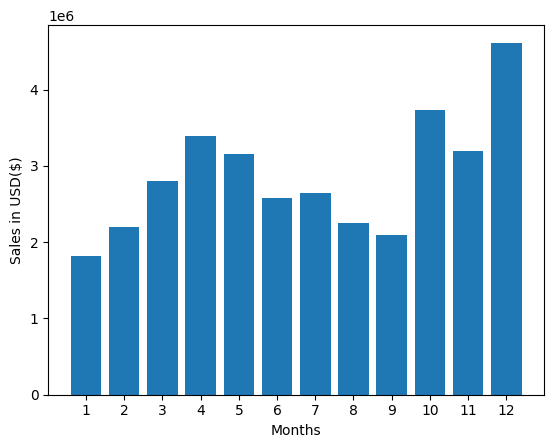

In [ ]:
# plot values
months = range(1, 13)

plt.bar(months, sales_by_month)
plt.xticks(months)
plt.ylabel("Sales in USD($)")
plt.xlabel("Months")
plt.show()

The 12th month of the year (Decenber) is the highest selling month with sales of $4,613,443.34. Probably due to festivities and end of the year sales promo. There are a lot of economic movements during the festive periods as more gifts are shared during those periods. The lowest selling months is the first month (January). This is most likely due to the spending from the oprevious december. As many people tend to be more conservative after spending a lot the previous month.

## 2. What city sold the most product

In [ ]:
# To do this, I first have to get the city for each order
# using the .apply() method

df["City"] = df['Purchase Address'].apply(lambda x: x.split(",")[1] + ' (' + x.split(",")[2][1:3] + ')')

# get the states
# df["State"] = df['Purchase Address'].apply(lambda x: x.split(",")[2][0:3])
df

<ipython-input-25-01eaf82a2a08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["City"] = df['Purchase Address'].apply(lambda x: x.split(",")[1] + ' (' + x.split(",")[2][1:3] + ')')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00,Portland (ME)
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco (CA)
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99,New York City (NY)
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta (GA)
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle (WA)
...,...,...,...,...,...,...,...,...,...
186300,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101",5,99.99,Seattle (WA)
186301,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016",5,11.99,San Francisco (CA)
186302,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215",5,5.98,Boston (MA)
186303,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101",5,11.95,Seattle (WA)


In [ ]:
df['City'].unique()

array([' Portland (ME)', ' San Francisco (CA)', ' New York City (NY)',
       ' Atlanta (GA)', ' Seattle (WA)', ' Austin (TX)',
       ' Los Angeles (CA)', ' Dallas (TX)', ' Boston (MA)',
       ' Portland (OR)'], dtype=object)

All the orders are from just 9 cities

In [ ]:
sales_by_cities = df.groupby('City')['Sales'].sum()
sales_by_cities

,Sales
City,
Atlanta (GA),2795498.58
Austin (TX),1819581.75
Boston (MA),3661642.01
Dallas (TX),2767975.40
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Portland (ME),449758.27
Portland (OR),1870732.34
San Francisco (CA),8262203.91


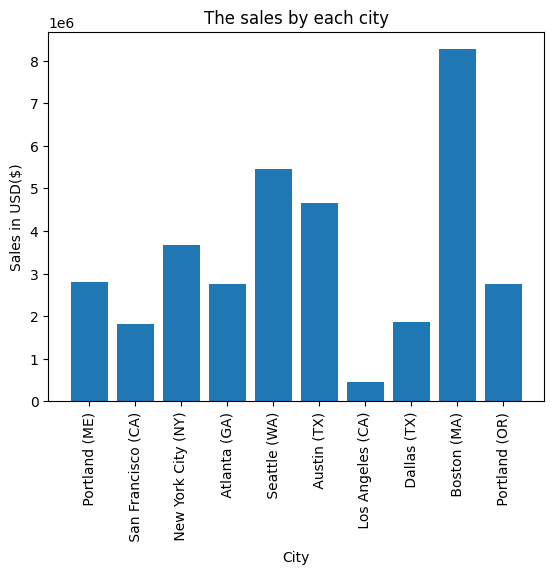

In [ ]:
# plotting the result

cities = df['City'].unique()

plt.bar(cities, sales_by_cities)
plt.xticks(cities, rotation=90)
plt.ylabel("Sales in USD($)")
plt.xlabel("City")
plt.title("The sales by each city")
plt.show()

# 3. What time hould we display the advertisement to maximize the likelihood of customer purchase

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

<ipython-input-32-f5779b1b9e1a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
<ipython-input-32-f5779b1b9e1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland (ME)
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco (CA)
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City (NY)
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta (GA)
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle (WA)
...,...,...,...,...,...,...,...,...,...
186300,209916,Bose SoundSport Headphones,1,99.99,2019-05-08 19:15:00,"235 Center St, Seattle, WA 98101",5,99.99,Seattle (WA)
186301,209917,Wired Headphones,1,11.99,2019-05-24 22:02:00,"926 9th St, San Francisco, CA 94016",5,11.99,San Francisco (CA)
186302,209918,AAA Batteries (4-pack),2,2.99,2019-05-24 17:44:00,"868 Hickory St, Boston, MA 02215",5,5.98,Boston (MA)
186303,209919,USB-C Charging Cable,1,11.95,2019-05-04 12:46:00,"204 Adams St, Seattle, WA 98101",5,11.95,Seattle (WA)


In [ ]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df

<ipython-input-36-ce60794fefa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].dt.hour
<ipython-input-36-ce60794fefa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute'] = df['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland (ME),1,35
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco (CA),7,24
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City (NY),9,46
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta (GA),16,47
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle (WA),20,32
...,...,...,...,...,...,...,...,...,...,...,...
186300,209916,Bose SoundSport Headphones,1,99.99,2019-05-08 19:15:00,"235 Center St, Seattle, WA 98101",5,99.99,Seattle (WA),19,15
186301,209917,Wired Headphones,1,11.99,2019-05-24 22:02:00,"926 9th St, San Francisco, CA 94016",5,11.99,San Francisco (CA),22,2
186302,209918,AAA Batteries (4-pack),2,2.99,2019-05-24 17:44:00,"868 Hickory St, Boston, MA 02215",5,5.98,Boston (MA),17,44
186303,209919,USB-C Charging Cable,1,11.95,2019-05-04 12:46:00,"204 Adams St, Seattle, WA 98101",5,11.95,Seattle (WA),12,46
